In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install keras-tuner

In [4]:
!pwd
PATH = '/content/drive/MyDrive/'
PATH_AFTER_MYDRIVE = 'MSC_DATA_SCIENCE/ComputerVision_CW/'
FINAL_PATH = PATH + PATH_AFTER_MYDRIVE
%cd $FINAL_PATH

/content
/content/drive/MyDrive/MSC_DATA_SCIENCE/ComputerVision_CW


In [5]:
#HOG 
hog_test = np.load('generated_data/HOG_DES_test.npy')
hog_train = np.load('generated_data/HOG_DES_train.npy')

In [5]:
#SIFT

sift_trainx,sift_trainy = np.load('generated_data/SIFT_DES_trainx.npy'),np.load('generated_data/SIFT_DES_trainy.npy')
sift_testx,sift_testy = np.load('generated_data/SIFT_DES_testx.npy'),np.load('generated_data/SIFT_DES_testy.npy')

In [6]:
test_images  = np.load('generated_data/test_images.npy')
train_images = np.load('generated_data/train_images.npy')
print(np.shape(test_images),'- Test Image Array Shape')
print(np.shape(train_images),'- Train Image Array Shape')

(3068, 100, 100, 3) - Test Image Array Shape
(12271, 100, 100, 3) - Train Image Array Shape


In [7]:
import pandas as pd
train_labels = pd.read_csv('labels/list_label_train.txt',delimiter = "\s+",names = ['File','Class'])
test_labels = pd.read_csv('labels/list_label_test.txt',delimiter = "\s+",names = ['File','Class'])
num2emo = ['Suprise','Fear','Disgust','Happiness','Sadness','Anger','Neutral']
print(train_labels['Class'].value_counts())
y_train = train_labels['Class'].to_numpy()
print(test_labels['Class'].value_counts())
y_test = test_labels['Class'].to_numpy()
y_train = y_train-1
y_test  = y_test-1
print(min(y_train),max(y_train),'Training Minmax')
print(min(y_test),max(y_test),'Test Minmax')

4    4772
7    2524
5    1982
1    1290
3     717
6     705
2     281
Name: Class, dtype: int64
4    1185
7     680
5     478
1     329
6     162
3     160
2      74
Name: Class, dtype: int64
0 6 Training Minmax
0 6 Test Minmax


In [8]:
print(np.shape(hog_train))

(12271, 800)


In [9]:
class MLP():

  def __init__(self,shape_in):
    self.model = self.reset_mod(shape_in)

  def reset_mod(self,inputshape):
    model = Sequential()
    model.add(layers.Dense(168, activation='relu',input_shape=inputshape))
    model.add(layers.Dense(65, activation='relu'))
    model.add(layers.Dense(58, activation='relu'))


    #Output
    model.add(layers.Dense(7))

    return model


  def compile(self):
      self.model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
      
      return self.model
      
  def details(self):

    print(self.model.summary())




In [10]:
net = MLP((1,800))
model = net.compile()
net.details()
print()
print()
print('Training:')
hist = model.fit(hog_train, y_train,batch_size=125,epochs=50,validation_data=(hog_test,y_test),verbose=1)
#model.save('Trained_CNN',overwrite=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 168)            134568    
_________________________________________________________________
dense_1 (Dense)              (None, 1, 65)             10985     
_________________________________________________________________
dense_2 (Dense)              (None, 1, 58)             3828      
_________________________________________________________________
dense_3 (Dense)              (None, 1, 7)              413       
Total params: 149,794
Trainable params: 149,794
Non-trainable params: 0
_________________________________________________________________
None


Training:
Epoch 1/50
99/99 [==============================] - 4s 9ms/step - loss: 1.6194 - accuracy: 0.3965 - val_loss: 1.2996 - val_accuracy: 0.5254
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 1.2463 - accuracy: 

In [11]:
model.save('Hog_MLP',overwrite=True)

INFO:tensorflow:Assets written to: Hog_MLP/assets


In [8]:
model = tf.keras.models.load_model('Hog_MLP')

In [9]:
from sklearn.metrics import f1_score 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.6574455955324463 Weighted F1
0.6659061277705346 Test Acc.


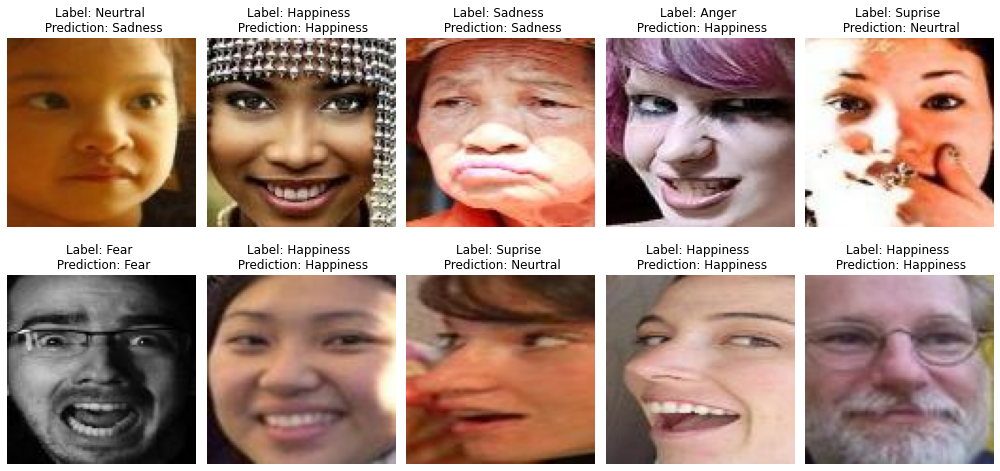

In [10]:
yhat_test = model.predict_classes(hog_test)
test_accruacy =  np.sum(yhat_test == y_test)/len(y_test)
print(f1_score(y_test,yhat_test,average='weighted'),'Weighted F1')
print(test_accruacy,'Test Acc.')
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for ind,i in enumerate(np.random.randint(0,3068,10)):
    ax[ind].imshow(test_images[i])
    ax[ind].set_title(f'Label: {num2emo[y_test[i]]} \n Prediction: {num2emo[yhat_test[i]]}')
    ax[ind].set_axis_off()
fig.tight_layout()
plt.show()

(12263, 70)


In [ ]:
# SIFT - MLP

In [16]:
class sift_MLP():

  def __init__(self,shape_in):
    self.model = self.reset_mod(shape_in)

  def reset_mod(self,inputshape):
    model = Sequential()
    model.add(layers.Dense(121, activation='relu',input_shape=inputshape))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(171, activation='relu'))


    #Output
    model.add(layers.Dense(7))

    return model


  def compile(self):
      self.model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
      
      return self.model
      
  def details(self):

    print(self.model.summary())




In [17]:
net = sift_MLP((1,70))
model = net.compile()
net.details()
print()
print()
print('Training:')
hist = model.fit(sift_trainx, sift_trainy,batch_size=125,epochs=50,validation_data=(sift_testx,sift_testy),verbose=1)
#model.save('Trained_CNN',overwrite=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1, 121)            8591      
_________________________________________________________________
dense_5 (Dense)              (None, 1, 256)            31232     
_________________________________________________________________
dense_6 (Dense)              (None, 1, 171)            43947     
_________________________________________________________________
dense_7 (Dense)              (None, 1, 7)              1204      
Total params: 84,974
Trainable params: 84,974
Non-trainable params: 0
_________________________________________________________________
None


Training:
Epoch 1/50
99/99 [==============================] - 1s 6ms/step - loss: 1.9060 - accuracy: 0.3523 - val_loss: 1.6779 - val_accuracy: 0.3862
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 1.6567 - accuracy: 

In [23]:
model.save('MLP_Sift',overwrite=True)

INFO:tensorflow:Assets written to: MLP_Sift/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.35939022758934164 Weighted F1
0.42596216568819306 Test Acc.


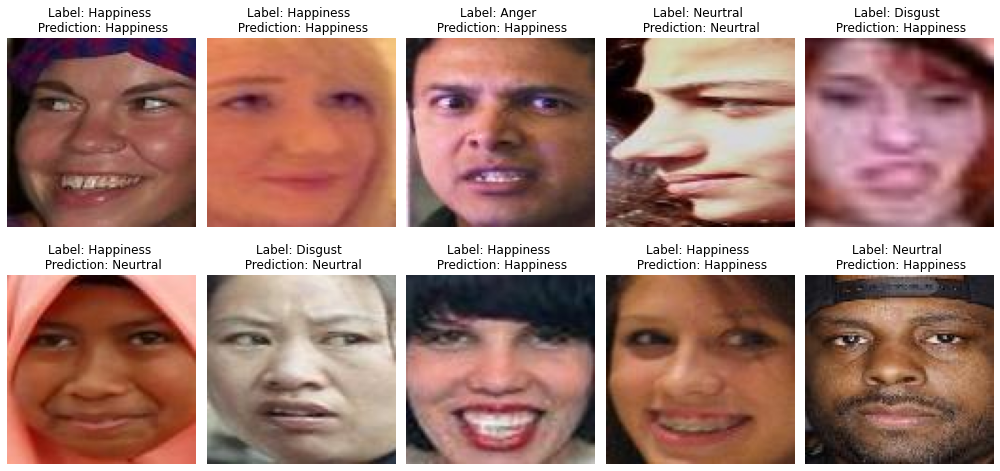

In [20]:
yhat_test = model.predict_classes(sift_testx)
test_accruacy =  np.sum(yhat_test == sift_testy)/len(sift_testy)
print(f1_score(sift_testy,yhat_test,average='weighted'),'Weighted F1')
print(test_accruacy,'Test Acc.')
fig, axes = plt.subplots(2, 5, figsize=(14, 7), sharex=True, sharey=True)
ax = axes.ravel()

for ind,i in enumerate(np.random.randint(0,3068,10)):
    ax[ind].imshow(test_images[i])
    ax[ind].set_title(f'Label: {num2emo[y_test[i]]} \n Prediction: {num2emo[yhat_test[i]]}')
    ax[ind].set_axis_off()
fig.tight_layout()
plt.show()

TUNING HOG MLP:

In [21]:
#TUNING HOG MLP

def hog_mlp_tuner(hp):
    model = Sequential()
    model.add(layers.Dense(hp.Int('neuron1', 2, 256), activation='relu',input_shape=(1,800)))
    model.add(layers.Dense(hp.Int('neuron2', 2, 256), activation='relu'))
    model.add(layers.Dense(hp.Int('neuron3', 2, 256), activation='relu'))


    #Output
    model.add(layers.Dense(7))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])



    return model

In [13]:
import kerastuner as kt


In [18]:
from sklearn.model_selection import train_test_split
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(hog_train, y_train, test_size=0.2, random_state=42)

In [22]:
tuner = kt.tuners.BayesianOptimization(hog_mlp_tuner, objective="val_accuracy",max_trials=20,overwrite=True)

In [23]:
tuner.search(
    X_train_tune,y_train_tune,
    validation_data=(X_test_tune,y_test_tune),
    epochs=25,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)],
)

best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

Trial 20 Complete [00h 00m 03s]
val_accuracy: 0.021181263029575348

Best val_accuracy So Far: 0.4004073441028595
Total elapsed time: 00h 01m 17s
INFO:tensorflow:Oracle triggered exit


In [28]:
print(best_hyperparameters.values)

{'neuron1': 168, 'neuron2': 65, 'neuron3': 58, 'learning_rate': 0.01}


TUNING SIFT MLP

In [40]:
#TUNING SIFT MLP

def sift_mlp_tuner(hp):
    model = Sequential()
    model.add(layers.Dense(hp.Int('neuron1', 2, 256), activation='relu',input_shape=(1,70)))
    model.add(layers.Dense(hp.Int('neuron2', 2, 256), activation='relu'))
    model.add(layers.Dense(hp.Int('neuron3', 2, 256), activation='relu'))


    #Output
    model.add(layers.Dense(7))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])



    return model

In [41]:
from sklearn.model_selection import train_test_split
X_train_tune, X_test_tune, y_train_tune, y_test_tune = train_test_split(sift_trainx, sift_trainy, test_size=0.2, random_state=42)

In [42]:
tuner = kt.tuners.BayesianOptimization(sift_mlp_tuner, objective="val_accuracy",max_trials=20,overwrite=True)

In [43]:
tuner.search(
    X_train_tune,y_train_tune,
    validation_data=(X_test_tune,y_test_tune),
    epochs=25,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)],
)

best_model = tuner.get_best_models(1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

Trial 20 Complete [00h 00m 02s]
val_accuracy: 0.15939666330814362

Best val_accuracy So Far: 0.40521809458732605
Total elapsed time: 00h 01m 31s
INFO:tensorflow:Oracle triggered exit


In [44]:
print(best_hyperparameters.values)

{'neuron1': 121, 'neuron2': 256, 'neuron3': 170, 'learning_rate': 0.0001}


Trying MLP without a feature detector:

In [9]:
class MLP_noFD():

  def __init__(self,shape_in):
    self.model = self.reset_mod(shape_in)

  def reset_mod(self,inputshape):
    model = Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu',input_shape=inputshape))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))


    #Output
    model.add(layers.Dense(7))

    return model


  def compile(self):
      self.model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
      
      return self.model
      
  def details(self):

    print(self.model.summary())




In [10]:
net = MLP_noFD((1,len(train_images[0].ravel())))
model = net.compile()

print()
print()
print('Training:')
hist = model.fit(train_images/255, y_train,batch_size=100,epochs=50,validation_data=(test_images/255,y_test),verbose=1)
#model.save('Trained_CNN',overwrite=True)



Training:
Epoch 1/50
123/123 [==============================] - 13s 105ms/step - loss: 1.5932 - accuracy: 0.4080 - val_loss: 1.3193 - val_accuracy: 0.4919
Epoch 2/50
123/123 [==============================] - 12s 99ms/step - loss: 1.2773 - accuracy: 0.5394 - val_loss: 1.2823 - val_accuracy: 0.5212
Epoch 3/50
123/123 [==============================] - 12s 100ms/step - loss: 1.1974 - accuracy: 0.5645 - val_loss: 1.1764 - val_accuracy: 0.5893
Epoch 4/50
123/123 [==============================] - 13s 106ms/step - loss: 1.1145 - accuracy: 0.6119 - val_loss: 1.0548 - val_accuracy: 0.6069
Epoch 5/50
123/123 [==============================] - 12s 99ms/step - loss: 1.0993 - accuracy: 0.6126 - val_loss: 1.0506 - val_accuracy: 0.6226
Epoch 6/50
123/123 [==============================] - 12s 99ms/step - loss: 1.0640 - accuracy: 0.6338 - val_loss: 1.0090 - val_accuracy: 0.6382
Epoch 7/50
123/123 [==============================] - 12s 99ms/step - loss: 1.0101 - accuracy: 0.6469 - val_loss: 1.0291 